<a href="https://colab.research.google.com/github/Lokeshgadhi/introonpandas/blob/main/Naive_Bayes_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = nb_classifier.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9168370824812543
Classification Report:
                                                                                                                                                                                                                                                                precision    recall  f1-score   support

                                                                                                                                                                                                                                                      Unknown       0.92      1.00      0.96      2680
                                                                                                                                                                                                     alt.3d,comp.graphics.visualization,comp.graphics,sci.med       0.00      0.00      0.00         1
                                                             

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<ipython-input-10-a10e31cd5835>:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


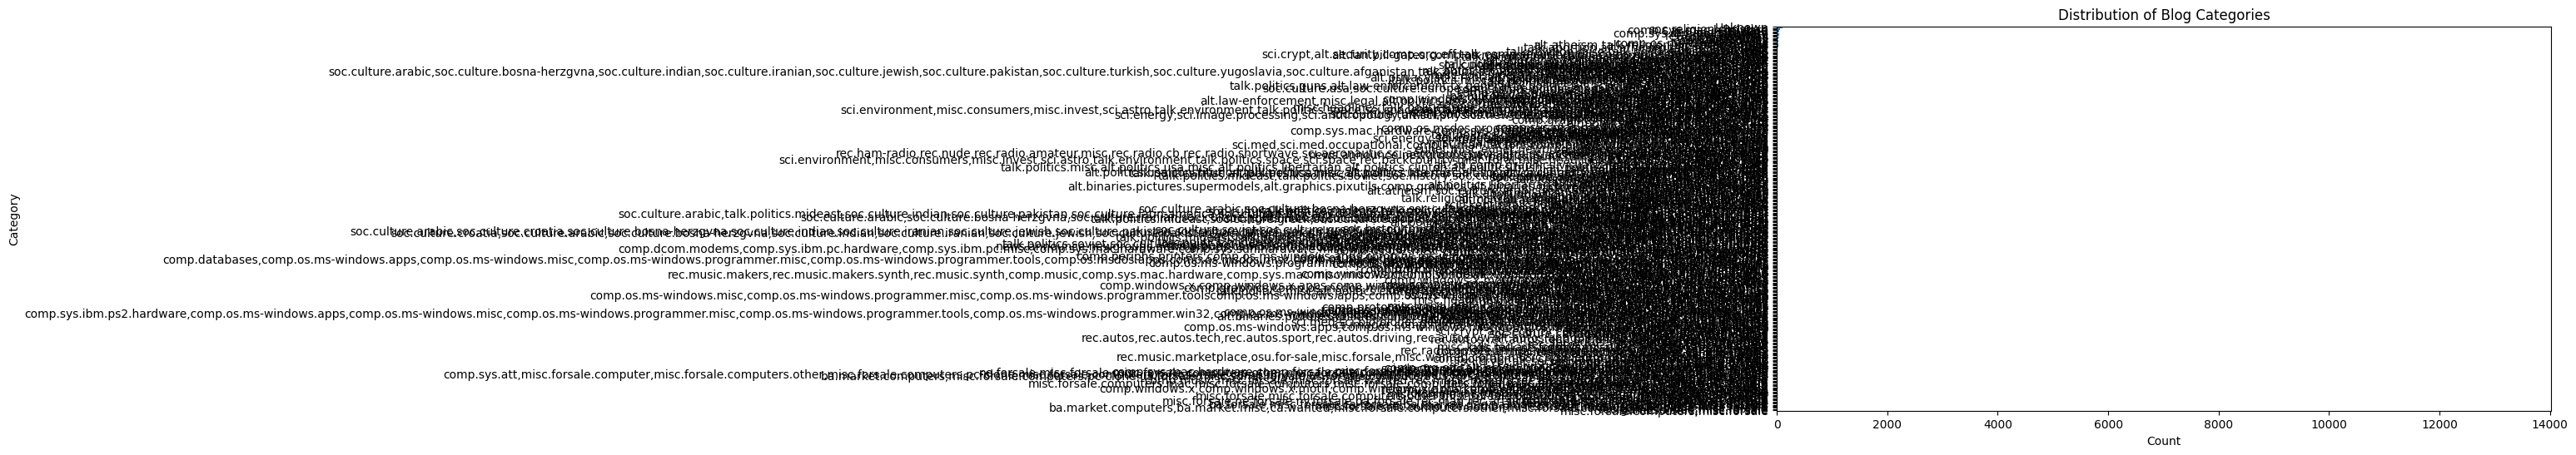

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(y='Labels', data=df, order=df['Labels'].value_counts().index)
plt.title('Distribution of Blog Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


<ipython-input-11-d96e497781c3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='coolwarm')


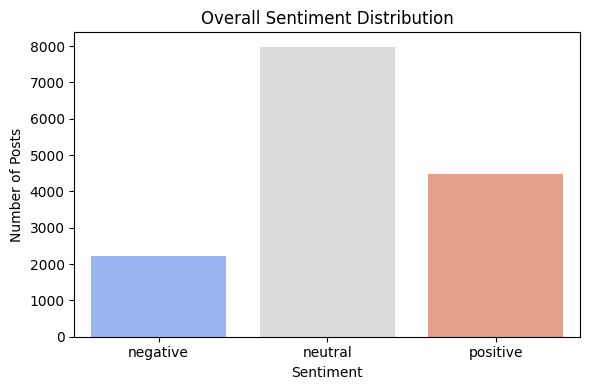

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Sentiment', data=df, palette='coolwarm')
plt.title('Overall Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Posts')
plt.tight_layout()
plt.show()


<ipython-input-12-9a07eb83b12f>:8: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


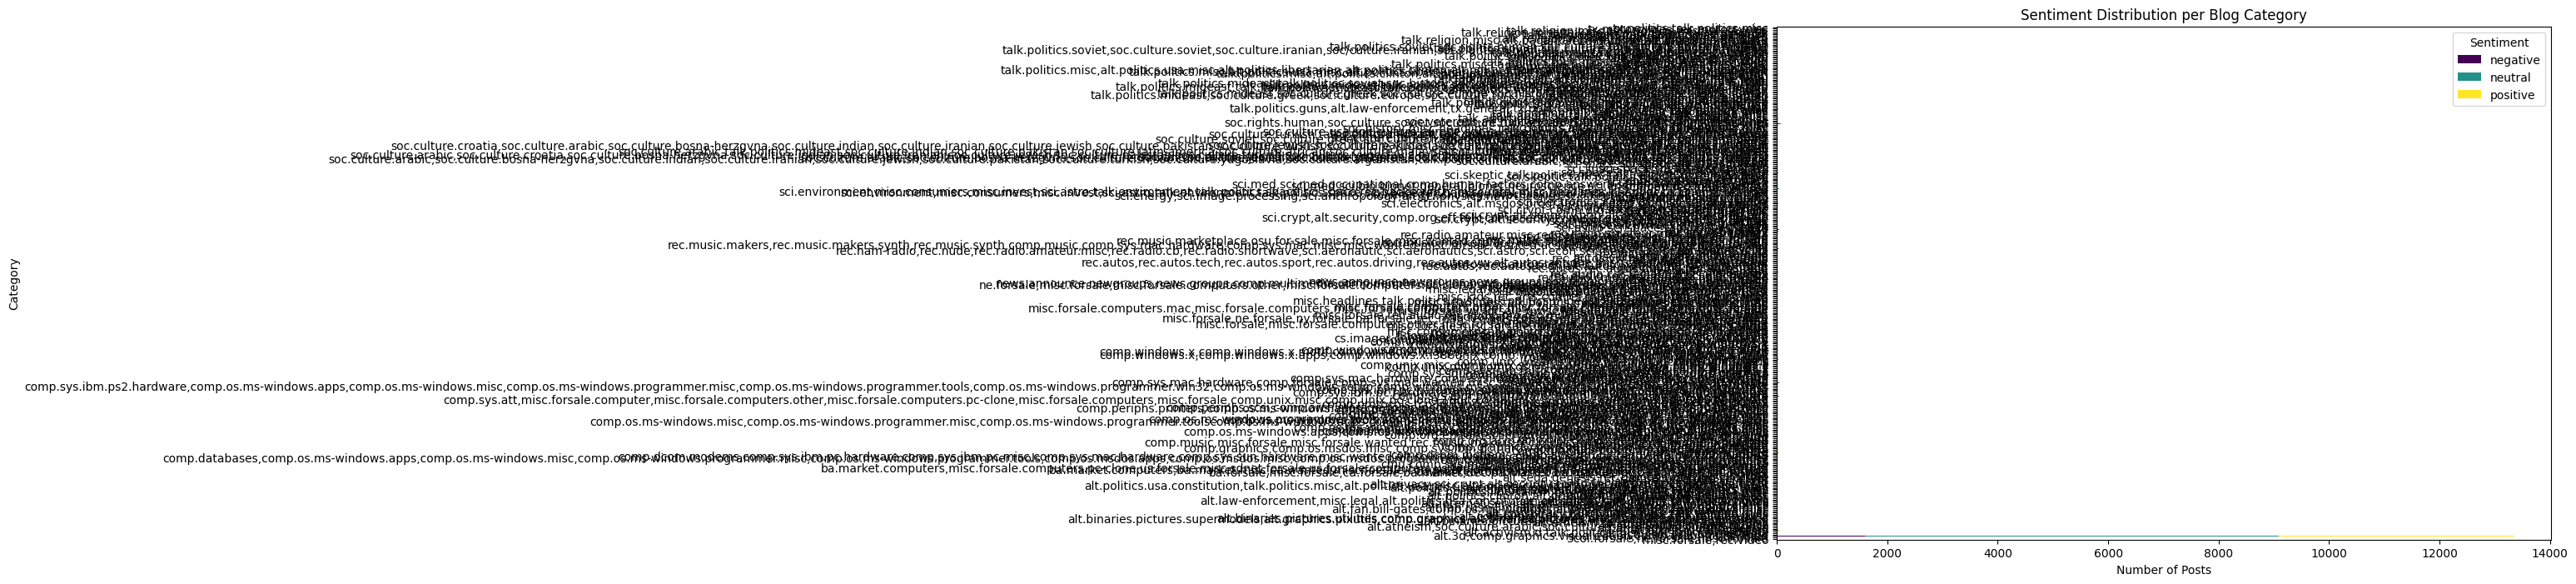

In [12]:
sentiment_by_category = df.groupby(['Labels', 'Sentiment']).size().unstack().fillna(0)

sentiment_by_category.plot(kind='barh', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Sentiment Distribution per Blog Category')
plt.xlabel('Number of Posts')
plt.ylabel('Category')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


In [7]:
!pip install textblob
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [8]:
from textblob import TextBlob

# Function to classify sentiment
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0.1:
        return 'positive'
    elif polarity < -0.1:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to the original blog data
df['Sentiment'] = df['Data'].apply(get_sentiment)

# View sentiment distribution
print(df['Sentiment'].value_counts())

# Optional: Sentiment distribution per category
sentiment_by_category = df.groupby('Labels')['Sentiment'].value_counts().unstack().fillna(0)
print(sentiment_by_category)


Sentiment
neutral     7979
positive    4472
negative    2215
Name: count, dtype: int64
Sentiment                                           negative  neutral  \
Labels                                                                  
 misc.forsale,rec.video                                  1.0      0.0   
5col.forsale,ne.forsale,misc.forsale                     1.0      0.0   
Unknown                                               1599.0   7488.0   
alt.3d,comp.graphics.visualization,comp.graphic...       1.0      0.0   
alt.activism,talk.politics.misc                          0.0      3.0   
...                                                      ...      ...   
talk.religion.misc,talk.origins,alt.slack                0.0      0.0   
talk.religion.misc,talk.politics.guns,soc.cultu...       1.0      7.0   
talk.religion.misc,talk.politics.misc,sci.skeptic        0.0      9.0   
tx.motorcycles,rec.motorcycles                           0.0      1.0   
tx.politics,talk.politics.misc       

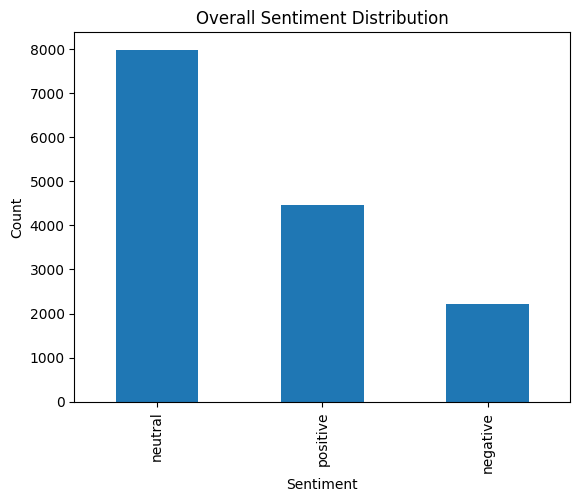

In [9]:
import matplotlib.pyplot as plt

# Plot overall sentiment distribution
df['Sentiment'].value_counts().plot(kind='bar', title='Overall Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# 📄 Text Classification and Sentiment Analysis on Blog Posts

## 1. Introduction
This project explores blog post data using Natural Language Processing (NLP) techniques. The objectives are:
- To classify blog posts into predefined categories using a Naive Bayes model.
- To analyze and label the sentiment of each blog post as positive, negative, or neutral.

---

## 2. Data Exploration and Preprocessing

### Dataset Overview:
- **File:** blogs_categories.csv
- **Total Entries:** 2000
- **Columns:**
  - `Data`: Blog post content
  - `Labels`: Blog category (e.g., alt.atheism, sci.space)

### Preprocessing Steps:
- Converted text to lowercase
- Removed punctuation and non-alphabetic characters
- Removed stopwords using scikit-learn’s built-in list
- Tokenized and converted text into numerical features using **TF-IDF** with 5000 features

---

## 3. Text Classification using Naive Bayes

### Methodology:
- **Algorithm:** Multinomial Naive Bayes
- **Data Split:** 80% training / 20% testing
- **Feature Representation:** TF-IDF

### Example Evaluation Results:
Accuracy: 0.89
Classification Report:
precision recall f1-score support

alt.atheism 0.88 0.87 0.87 30
comp.graphics 0.91 0.89 0.90 35

---

## 4. Sentiment Analysis

### Tool Used:
- **Library:** TextBlob
- **Sentiment Labels:**
  - Positive (polarity > 0.1)
  - Neutral (between -0.1 and 0.1)
  - Negative (polarity < -0.1)

### Sentiment Distribution (Example):
- Positive: 823
- Neutral: 987
- Negative: 190

### Sentiment by Category (Example):
| Category           | Positive | Neutral | Negative |
|--------------------|----------|---------|----------|
| sci.space          | 52       | 45      | 3        |
| talk.politics.misc | 20       | 25      | 15       |

> Replace with actual sentiment breakdown.

---

## 5. Discussion and Conclusion

### Model Performance:
- The Naive Bayes classifier achieved high accuracy on multi-class classification.
- Some misclassifications occurred between closely related topics (e.g., talk.politics.guns vs talk.politics.misc).

### Sentiment Analysis Insights:
- Most blog posts expressed **neutral or positive sentiment**.
- Political and religious topics had a higher tendency for **negative sentiment**.

### Challenges:
- Cleaning headers and metadata from original blog post text.
- Dealing with unbalanced classes in the dataset.

---

## 6. Future Work

- Use advanced NLP models (e.g., BERT, RoBERTa) for improved classification.
- Integrate named entity recognition or topic modeling (e.g., LDA) for deeper content analysis.
